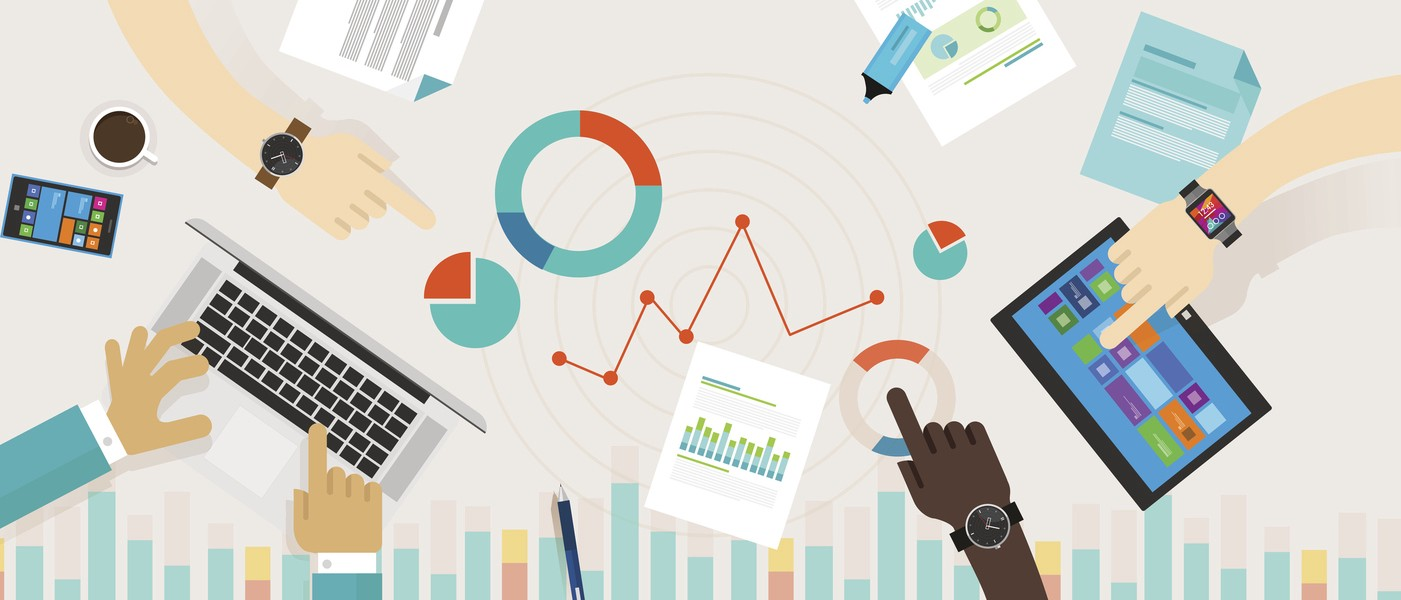


# What is Data analysis?

## Data analysis is a process of inspecting, cleansing, transforming and modeling data with the goal of discovering useful information, informing conclusions and supporting decision-making. Data analysis has multiple facets and approaches, encompassing diverse techniques under a variety of names, and is used in different business, science, and social science domains. In today's business world, data analysis plays a role in making decisions more scientific and helping businesses operate more effectively.(According to wikipedia)


# Who is Data Analyst?

## Data analysts translate numbers into plain English Every business collects data, whether it's sales figures, market research, logistics, or transportation costs. A data analyst's job is to take that data and use it to help companies make better business decisions. This could mean figuring out how to price new materials for the market, how to reduce transportation costs, solve issues that cost the company money, or determine how many people should be working on Saturdays.

## post a jobThere are many different types of data analysts in the field, including operations analysts, marketing analysts, financial analysts, etc.

# WHAT ARE THE EDUCATION REQUIREMENTS?

## A bachelor's degree is needed for most entry-level jobs, and a master's degree will be needed for many upper-level jobs. Most analysts will have degrees in fields like math, statistics, computer science, or something closely related to their field. Strong math and analysis skills are needed.

# HOW MUCH DO DATA ANALYSTS MAKE?

## We will analyze it from dataset.... :p :p

# If you like it, Please upvote

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Load dataset by panda
data = pd.read_csv("/kaggle/input/data-analyst-jobs/DataAnalyst.csv")

In [ ]:
# Shape of dataset
data.shape

In [ ]:
# Some information of data
data.info()

In [ ]:
# first 5 row of dataset
data.head()

In [ ]:
# drop Unnamed: 0
data.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
# rename some column
data.rename(columns = {'Salary Estimate':'Salary_Estimate', 'Type of ownership':'Ownership_type'}, inplace = True) 

## We can see that they replace NaN by -1
## I replace it by NaN

In [ ]:
# replace null value
def fill_null(col_name, rep, rep_val):
    data[col_name].replace(to_replace=rep, value=rep_val, inplace=True)

In [ ]:
fill_null("Competitors", "-1", np.nan)
fill_null("Easy Apply", "-1", "False")
fill_null("Rating", -1.0, np.nan)
fill_null("Size", "-1", np.nan)
fill_null("Founded", -1, np.nan)
fill_null("Industry", "-1", np.nan)
fill_null("Sector", "-1", np.nan)
fill_null("Ownership_type", "-1", np.nan)
fill_null("Revenue", "-1", np.nan)

In [ ]:
# You can use

# data.replace(to_replace =-1 , value=np.nan,inplace=True)
# data.replace(to_replace ='-1' , value=np.nan,inplace=True)
# data.replace(to_replace =-1.0 , value=np.nan,inplace=True)


# but i like to explore and create function

# Data cleaning

In [ ]:
def clean_data(name):
    data[name] = data[name].str.replace(r'\r\n|\r|\n\d*[0-9](|.\d*[0-9]|)*$', '')
    data[name] = data[name].str.replace(r'\r\n|\r|\n', ' ')

In [ ]:
# clean some unnecessary things from data
clean_data("Company Name")
clean_data("Job Description")
clean_data("Salary_Estimate")

In [ ]:
# replace $ sign, K sign

def change_form_of_value(Value):
    change = Value.replace("$", "")
    if "K" in change:
        change = (change.replace("K",""))
    return change

In [ ]:
# apply function
data["Salary_Estimate"] = data["Salary_Estimate"].apply(lambda x: change_form_of_value(x))

In [ ]:
# split by "-"
divide = data["Salary_Estimate"].str.split("-", expand=True)

In [ ]:
# convert numeric by extract
data['MinSalary'] = pd.to_numeric(divide[0].str.extract('(\d+)', expand=False)) * 1000

In [ ]:
data["MaxSalary"] = pd.to_numeric(divide[1].str.extract('(\d+)', expand=False)) * 1000

In [ ]:
data.head(3)

In [ ]:
print("Jobs and total job post")
print("********************************************")
print(data["Job Title"].value_counts()[:30])

# Connt of all rated jobs

In [ ]:
rat_jobs = data["Rating"].value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(14,9))
rect1 = sns.barplot(x=rat_jobs.index, y=rat_jobs.values, palette="deep")
ax.set_title("Total count Of all rated jobs", fontweight="bold")

for p in rect1.patches:
    rect1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.5, p.get_height()+1.3), ha='center', va='bottom', color= 'black', rotation=90)

## Max Jobs for rating is 3.9 ==> 140
## 3.6 rated ==> 136
## 5.0 rated ==> 131

In [ ]:
plt.subplots(figsize=(8,4))
sns.countplot(data["Easy Apply"])

# 30 Company and their highest minimum salary

In [ ]:
easy_apply = data.copy()
easy_apply = data[data["Easy Apply"] == "True"].sort_values("MinSalary", ascending=False)[:30]
easy_apply.drop_duplicates(subset ="Company Name",keep=False,inplace=True)

plt.subplots(figsize=(12, 8))
rect2 = plt.barh(easy_apply["Company Name"], easy_apply["MinSalary"], label="Minimum Salary", color="#ff6767")
plt.legend()
plt.title("First 30 company according to highest Minimum Salary", fontweight="bold")

for index, value in enumerate(easy_apply["MinSalary"]):

    plt.text(value, index - 0.2, str(value), fontweight="bold")

# Data Analyst and their Min Max Salary

In [ ]:
def jobVSsalary(title):
    data_analyst = data[data["Job Title"]==title]


    sns.set(style="white", palette="vlag", color_codes=True)


    f, ax = plt.subplots(1, 2, figsize=(12, 8), sharex=True)
    sns.despine(left=True)

    #Plot a histogram and kernel density estimate

    sns.distplot(data_analyst['MinSalary'], color="b", ax=ax[0])

    sns.distplot(data_analyst['MaxSalary'], color="r",ax=ax[1])

    plt.setp(ax, yticks=[])
    plt.tight_layout()
    plt.suptitle(f" Min and Max Salary for {title}")

In [ ]:
# for data analyst
jobVSsalary("Data Analyst")

In [ ]:
# Junior Data Analyst
jobVSsalary("Junior Data Analyst")

In [ ]:
# Quality Data Analyst
jobVSsalary("Quality Data Analyst")

In [ ]:
# for Senior data Analyst
jobVSsalary("Sr. Data Analyst")

In [ ]:
# Company Size Count
plt.subplots(figsize=(12,9))
rect3 = sns.countplot(x=data["Size"], palette="rocket")
plt.xticks(rotation=90)
plt.title("Company Size", fontweight="bold")
for p in rect3.patches:
    rect3.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+1.3), ha='center', va='bottom', color= 'black', rotation=90)

# 421 of the company size is 51 to 200 employees

In [ ]:
print("Ownership type in different sectors and count of total company")
print("*****************************************")
ownership = data["Ownership_type"].value_counts()
print(ownership)

# Count of different sector

In [ ]:
sns.set_style("whitegrid")
plt.subplots(figsize=(12,6))
plt.xticks(rotation=90)
sns.barplot(x=ownership.index, y=ownership.values, palette="Blues_d")
plt.xlabel("Sector")
plt.ylabel("Count of sectors")
plt.title("Counts of different sectors", fontweight="bold")

# Clean data - Revenue Columns

In [ ]:
def clean_revenue(x):
    revenue=0
    if(x== 'Unknown / Non-Applicable' or type(x)==float):
        revenue=0
    elif(('million' in x) and ('billion' not in x)):
        maxRev = x.replace('(USD)','').replace("million",'').replace('$','').strip().split('to')
        if('Less than' in maxRev[0]):
            revenue = float(maxRev[0].replace('Less than','').strip())
        else:
            if(len(maxRev)==2):
                revenue = float(maxRev[1]) * 1000000  # 1Million = 1000000
            elif(len(maxRev)<2):
                revenue = float(maxRev[0]) * 1000000
    elif(('billion'in x)):
        maxRev = x.replace('(USD)','').replace("billion",'').replace('$','').strip().split('to')
        if('+' in maxRev[0]):
            revenue = float(maxRev[0].replace('+','').strip())*1000000000 # 1Billion = 1000000000
        else:
            if(len(maxRev)==2):
                revenue = float(maxRev[1])*1000000000
            elif(len(maxRev)<2):
                revenue = float(maxRev[0])*1000000000
    return revenue

# new column by extract Revenue column

In [ ]:
data['MaxRevenue']=data['Revenue'].apply(lambda x: clean_revenue(x))

In [ ]:
# Group of sector and maxrevenue
revenueVSsector = data.groupby("Sector")["MaxRevenue"].mean().sort_values(ascending=False)

In [ ]:
revenueVSsector

# Different Sector and Maxrevenue avarage

In [ ]:
sns.set_style("whitegrid")
plt.subplots(figsize=(12,6))
sns.barplot(revenueVSsector.index, revenueVSsector.values, palette="colorblind")
plt.xlabel("Sector")
plt.ylabel("Revenue")
plt.title("Diffent sector vs revenue avarage", fontweight="bold")
plt.xticks(rotation=90)

# Different Industry and Maxrevenue avarage

In [ ]:
revenueVSindustry = data.groupby("Industry")["MaxRevenue"].mean().sort_values(ascending=False)[:30]

In [ ]:
revenueVSindustry

In [ ]:
sns.set_style("whitegrid")
plt.subplots(figsize=(12,6))
sns.barplot(revenueVSindustry.index, revenueVSindustry.values, palette="colorblind")
plt.xlabel("Industry")
plt.ylabel("Revenue")
plt.title("Diffent Industry vs revenue avarage", fontweight="bold")
plt.xticks(rotation=90)

# Company got competitors

In [ ]:
compet = data.copy()
compet_data = compet[["Company Name", "Competitors"]]

In [ ]:
# first 50 company and their competitors
compet_data[compet_data["Competitors"].isnull() == False][:50]

# Job Title Vs Salary

In [ ]:
JobVsSalary = data.groupby('Job Title')[['MaxSalary','MinSalary']].mean().sort_values(['MaxSalary','MinSalary'],ascending=False)[:30]

In [ ]:
JobVsSalary.plot(kind="bar", figsize=(17,8), width=1.0)
plt.ylabel("Salary")
plt.title("Location VS Salary")

# Which position you want to join? 

# HAHAHA - Money Every Where

# Location VS Salary range

In [ ]:
locationVSsalary = data.groupby('Location')[['MaxSalary','MinSalary']].mean().sort_values(['MaxSalary','MinSalary'],ascending=False)[:30]

In [ ]:
locationVSsalary.plot(kind="barh", figsize=(16,17), width=0.8)
plt.ylabel("Location")
plt.xlabel("Salary")
plt.title("Min and Max Salary From Different Location", fontweight="bold")

for index, value in enumerate(locationVSsalary["MaxSalary"]):
    plt.text(value + 0.5, index - 0.4, str(value))
    
    
for index, value in enumerate(locationVSsalary["MinSalary"]):
    plt.text(value + 0.2, index + 0.1, str(value))

# If you like it, Please upvote